In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [31]:
timestamps =[]
with open("timestamps_avril_2015.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps.append(np.array(row, dtype=np.float64))

In [32]:
len(timestamps)

720

In [39]:
big_timestamps = [np.array([]) for k in range(24)] 
for k in range(24):
    for i in range(30):
        big_timestamps[k] = np.concatenate((big_timestamps[k], timestamps[i*24 +k]))
    big_timestamps[k].sort()

In [40]:
big_timestamps[0].shape

(1173,)

In [26]:
from scipy.stats import norm

In [27]:
def kernel_estim(points,dates,n,bandwidth):
    krn = lambda t : np.sum(norm.pdf(t-dates, loc=0, scale=bandwidth))
    return np.array([krn(u)/n for u in points])

Results of the kernel estimation of $h$ based on 30 days (April 2015)

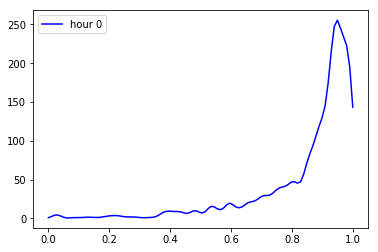

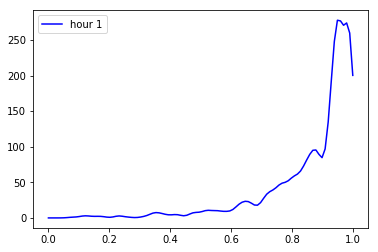

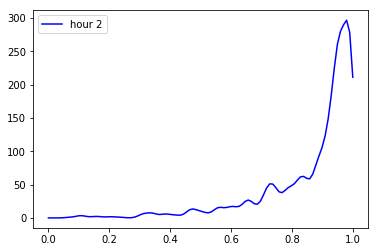

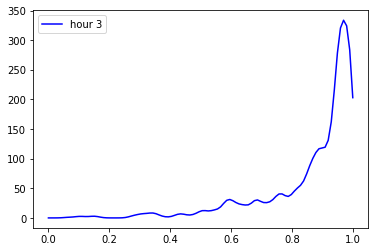

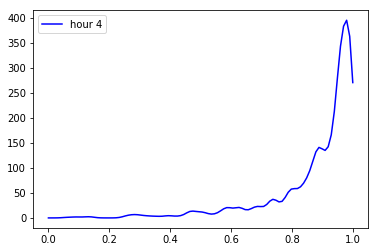

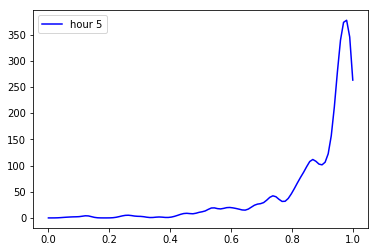

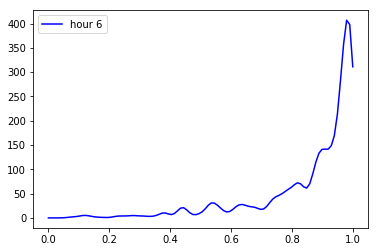

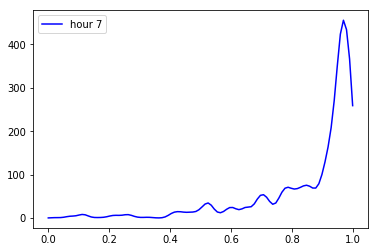

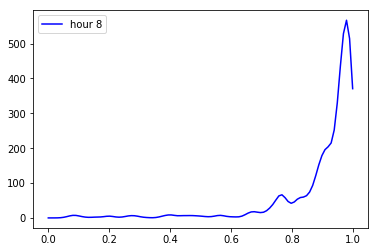

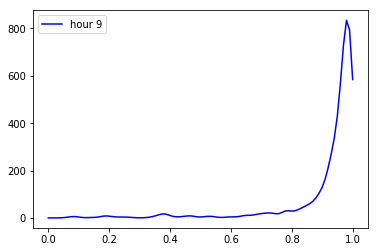

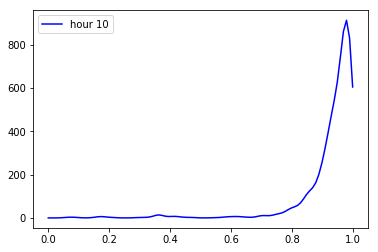

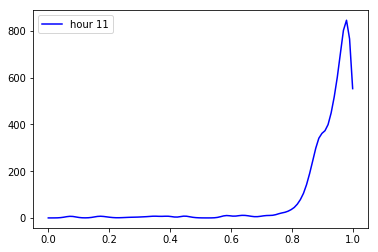

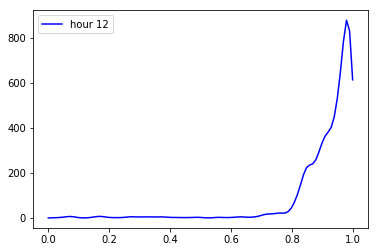

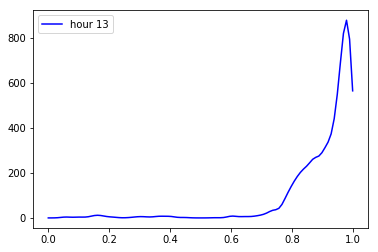

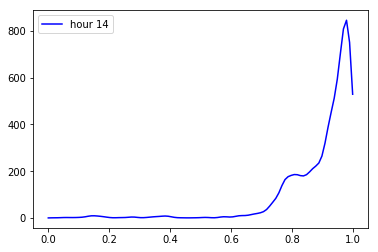

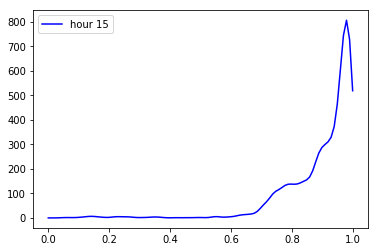

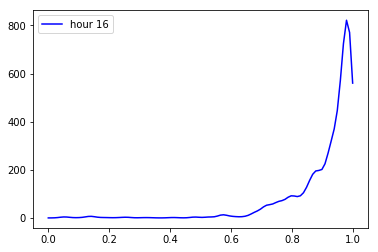

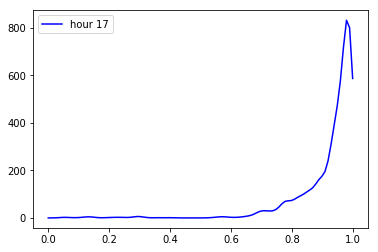

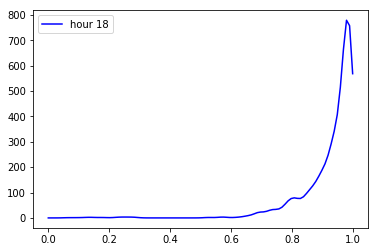

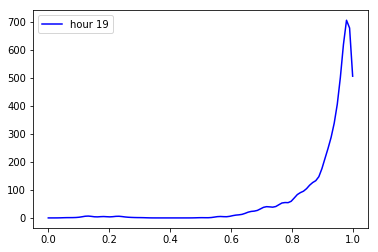

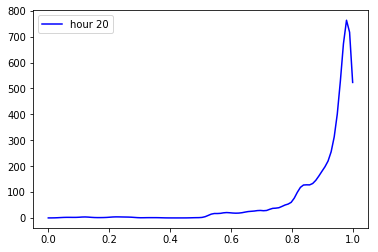

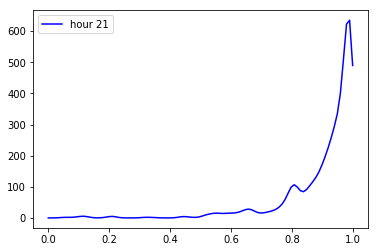

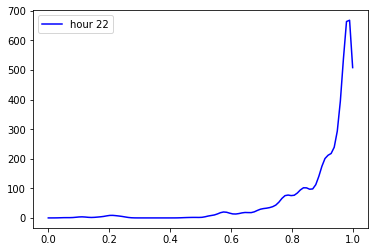

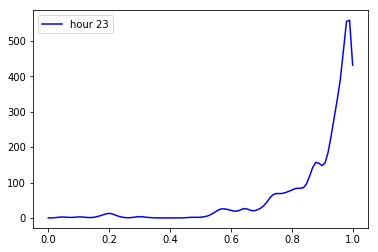

In [43]:
for i in range(24):
    Z_data= kernel_estim(np.linspace(0,1,100),big_timestamps[i],30,0.015)
    plt.plot(np.linspace(0,1,100),Z_data,"b",label="hour "+str(i))
    plt.legend()
    plt.show()

In [ ]:
market_ticks = pd.read_csv("ticks_0_1.csv")

In [ ]:
market_ticks